In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import glob
import numpy as np

In [2]:
outpath_fig = './dataFolders/Output/Figures/'
outpath = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters/'

In [3]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

In [ ]:
# get all data, remove outliers, 

# export that dataset

# parse through each flower
# get variables from fitted params
# tranform to linear equation
# fit for tau using elastic net penalty

# draw the exponential

1035.3999999999996 218166.6 -4.617500000000001 98.06750000000001
-3926.9500000000007 207425.95 -2.66 58.72
4473.6 202856.4 -1.8615000000000002 39.311499999999995
-1515.5 211367.5 -5.1785 111.1685


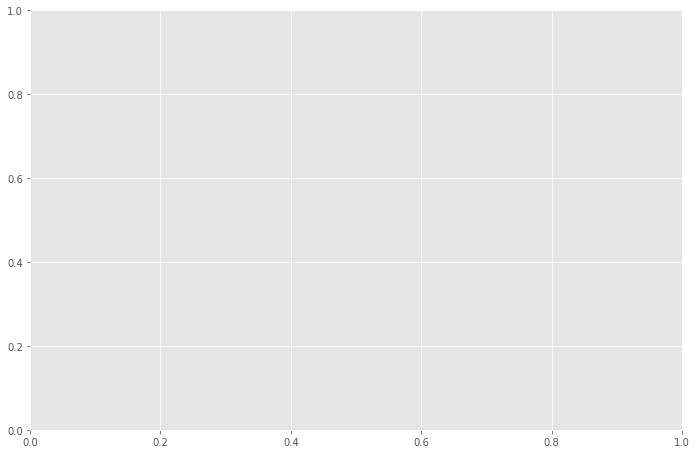

In [12]:
# do the fit for three different y0 - computed assuming the slope = 0 for 1/2 of the data
shapes = ['c-1', 'c-2','c-3', 'c-10']
# colorLine = ['royalblue', 'seagreen', 'goldenrod', 'tomato']
# fig1, ax0 = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (8,6))
fig1, ax = plt.subplots(figsize = (10,8))
# ax = ax0.ravel()

for floralShape, i in zip(shapes, range(len(shapes))):
       
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    xdata = new_df.MothIn.values
    ydata = new_df.DiscoveryTime.values
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].MothIn.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    numMoth = len(new_df.name.unique())
    
    param_file = glob.glob(outpath + floralShape + '_FittedParameters.csv')
    param_df = pd.read_csv(param_file[0])
    
    idx = 0 # pick all the 1/2 length data from the parameter df (because 1/2 length data slope is = 0 across all shapes)
    a0 = param_df.loc[idx,'alpha']
    mean_y0 = param_df.loc[idx, 'y_intercept']
#     tau = param_df.loc[idx, 'tau']
    
    # plot the final curve fit
    max_trial=max(xdata_notnan)
    ax.plot(xdata, ydata/100, 'or', markersize=7, alpha = 0.5, label = 'Raw Data')
#     ax.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, , mean_y0), 
#              '--', linewidth=2, color = colorLine[i], label = floralShape)   
#              label = 'fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0/100, tau/100, mean_y0/100))
    [ymin, ymax] = ax.get_ylim()
    [xmin, xmax] = ax.get_xlim()
    print(xmin, xmax, ymin, ymax)
    ax.set_title(floralShape, y=1.2)
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Exploration Time (second)')
    leg = plt.legend()
    leg.get_frame().set_linewidth(1.5)
    ax.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc=3, mode="expand", borderaxespad=0.)
    ax.set_xlim([-4000,220000])
    ax.set_ylim([-5,120])
    ax.text(60, 40, floralShape + ' N= ' + str(numMoth))
#     print(a0, tau, mean_y0)
    fig1.tight_layout()
    fig1.savefig(outpath_fig + floralShape + 'LearningOverTime_withoutClippingData.png')
    ax.cla()